In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/sample_submission.csv.zip


In [2]:
train_data=pd.read_csv('/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip')
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
test_data=pd.read_csv('/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip')

In [4]:
train_data.shape

(371, 7)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [6]:
numerical = ['bone_length','rotting_flesh','hair_length','has_soul']
categorical = ['color','type']

In [7]:
corr = train_data.corr()


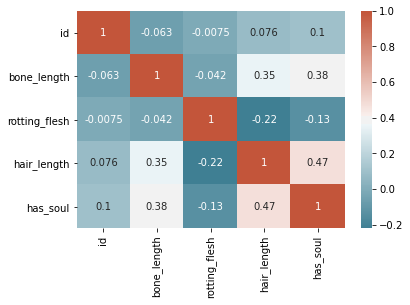

In [8]:
#heatmap gives a visual representation of correlation between different attributes of the data
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

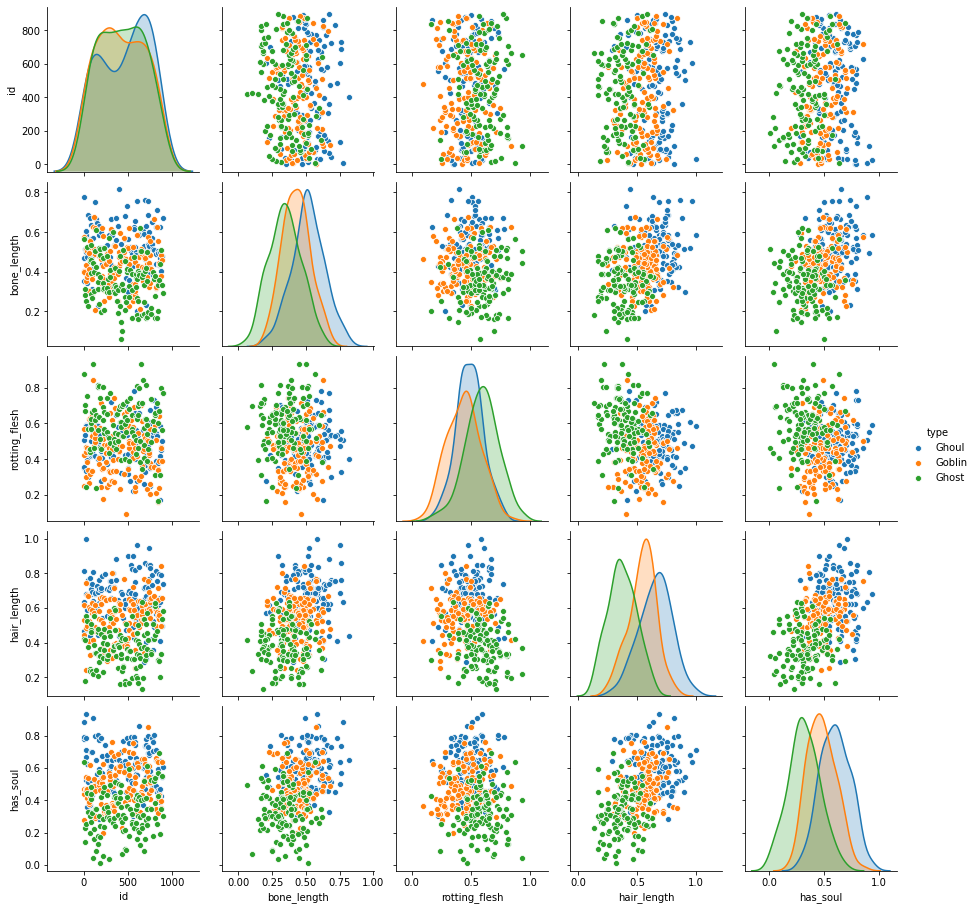

In [9]:
sns.pairplot(train_data,hue='type')

In [10]:
import matplotlib.pyplot as plt

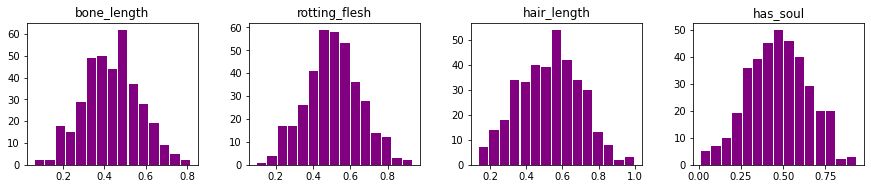

In [11]:
#Check if numerical attributes have normal distributions
train_data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4),rwidth=0.9,grid=False,color='purple');

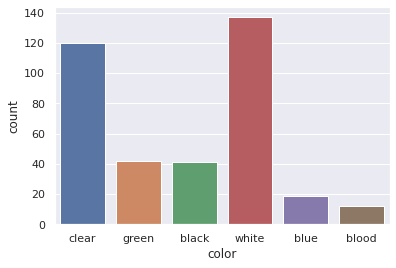

In [12]:
#Visualize categorical variables
sns.set()
sns.countplot(train_data['color'])

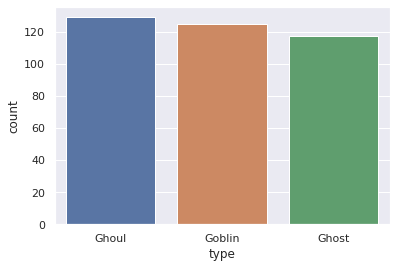

In [13]:
sns.set()
sns.countplot(train_data['type'])

In [14]:
#to plot countplots simultaneously
#fig, ax = plt.subplots(2, figsize=(6, 6))
#for variable, subplot in zip(categorical, ax.flatten()):
    #sns.countplot(train_data[variable], ax=subplot)

In [15]:
test_data.shape

(529, 6)

In [16]:
test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [18]:
train_data['color'].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [19]:
#Check if train and test data have the same categories
test_data['color'].unique()

array(['black', 'white', 'blue', 'clear', 'green', 'blood'], dtype=object)

In [20]:
#one-hot-encoding categorrical attribute:color
train_data=pd.concat([train_data,pd.get_dummies(train_data['color'])],axis=1)
train_data.drop('color',axis=1,inplace=True)
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,type,black,blood,blue,clear,green,white
0,0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,Goblin,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,Ghoul,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,Ghoul,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,Ghost,0,0,0,0,1,0


In [21]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['color'])],axis=1)
test_data.drop('color',axis=1,inplace=True)
test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


In [22]:
X=train_data.drop(['id','type'],axis=1)
y=pd.get_dummies(train_data['type'])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(296, 10) (296, 3)
(75, 10) (75, 3)


In [24]:
from keras.layers import Dense
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(Dense(100,input_shape=(X.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 21,603
Trainable params: 21,603
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
train=model.fit(x=X_train,y=y_train,batch_size=10,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
30/30 - 0s - loss: 1.0763 - accuracy: 0.4054 - val_loss: 1.0319 - val_accuracy: 0.4800
Epoch 2/10
30/30 - 0s - loss: 0.9559 - accuracy: 0.5777 - val_loss: 0.8980 - val_accuracy: 0.5867
Epoch 3/10
30/30 - 0s - loss: 0.7830 - accuracy: 0.6385 - val_loss: 0.7600 - val_accuracy: 0.6667
Epoch 4/10
30/30 - 0s - loss: 0.6479 - accuracy: 0.7027 - val_loss: 0.6821 - val_accuracy: 0.7067
Epoch 5/10
30/30 - 0s - loss: 0.6381 - accuracy: 0.6892 - val_loss: 0.6953 - val_accuracy: 0.6400
Epoch 6/10
30/30 - 0s - loss: 0.6142 - accuracy: 0.6926 - val_loss: 0.6560 - val_accuracy: 0.7200
Epoch 7/10
30/30 - 0s - loss: 0.5537 - accuracy: 0.7095 - val_loss: 0.6801 - val_accuracy: 0.6667
Epoch 8/10
30/30 - 0s - loss: 0.5588 - accuracy: 0.7196 - val_loss: 0.6396 - val_accuracy: 0.7333
Epoch 9/10
30/30 - 0s - loss: 0.5450 - accuracy: 0.7365 - val_loss: 0.6277 - val_accuracy: 0.7200
Epoch 10/10
30/30 - 0s - loss: 0.5786 - accuracy: 0.6926 - val_loss: 0.8134 - val_accuracy: 0.5867


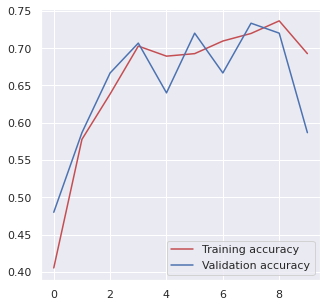

In [28]:
plt.figure(figsize=(5,5))
plt.plot(train.history['accuracy'],'r',label='Training accuracy')
plt.plot(train.history['val_accuracy'],'b',label='Validation accuracy')
plt.legend()

In [29]:
pred=model.predict(test_data.drop('id',axis=1))

In [30]:
pred_final=[np.argmax(i) for i in pred]

In [31]:
submission = pd.DataFrame({'id':test_data['id'], 'type':pred_final})
submission.head()

,id,type
0,3,1
1,6,1
2,9,1
3,10,2
4,13,0


In [32]:
submission.to_csv('../working/submission.csv', index=False)